#Visualization on Netflix Movies and TV Shows Dataset :- By Aditya Katariya

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Load Dataset from my Github Repository

In [49]:
df = pd.read_csv("https://raw.githubusercontent.com/Runtimepirate/netflix-eda/refs/heads/main/netflix_titles.csv") #My Github Username:- Runtimepirate

Preprocessing & Basic Info

In [50]:
print(df.info())
df['date_added'] = pd.to_datetime(df['date_added'].astype(str).str.strip(), errors='coerce')
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month
df['country'].fillna("Unknown", inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB
None


<ipython-input-50-6e4bda356b2d>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['country'].fillna("Unknown", inplace=True)


Movies vs TV Shows

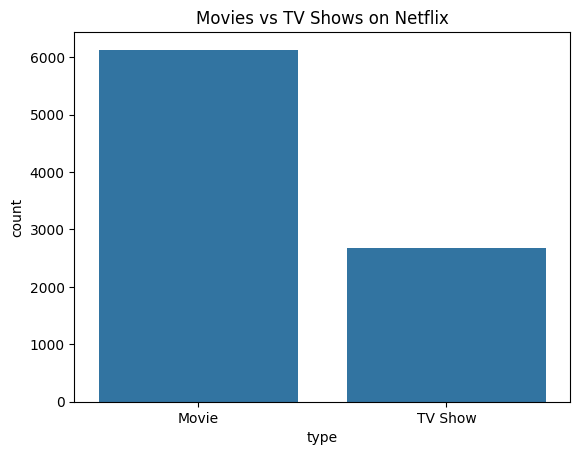

In [51]:
sns.countplot(x='type', data=df)
plt.title('Movies vs TV Shows on Netflix')
plt.show()

Titles Added Each Year

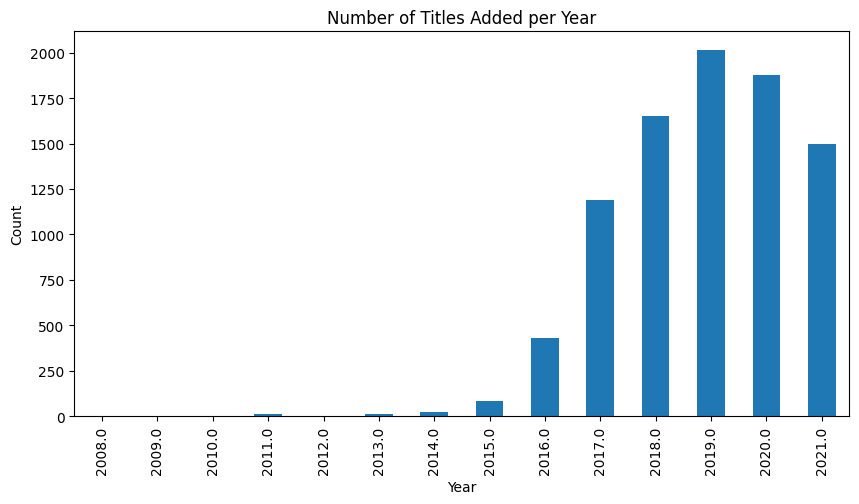

In [52]:
df['year_added'].value_counts().sort_index().plot(kind='bar', figsize=(10,5))
plt.title('Number of Titles Added per Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

Top 10 Countries by Content

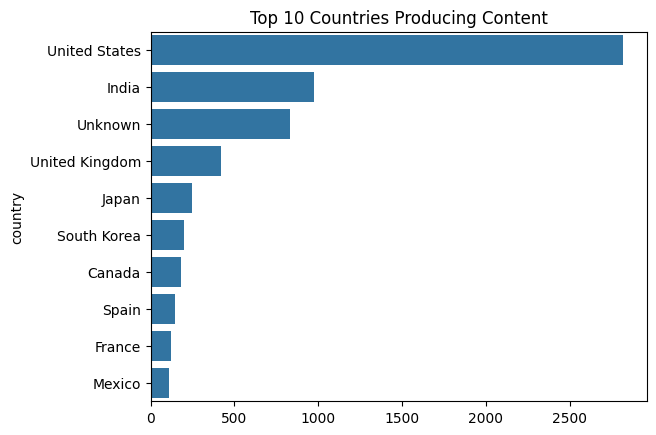

In [53]:
top_countries = df['country'].value_counts().head(10)
sns.barplot(x=top_countries.values, y=top_countries.index)
plt.title('Top 10 Countries Producing Content')
plt.show()

Ratings Distribution

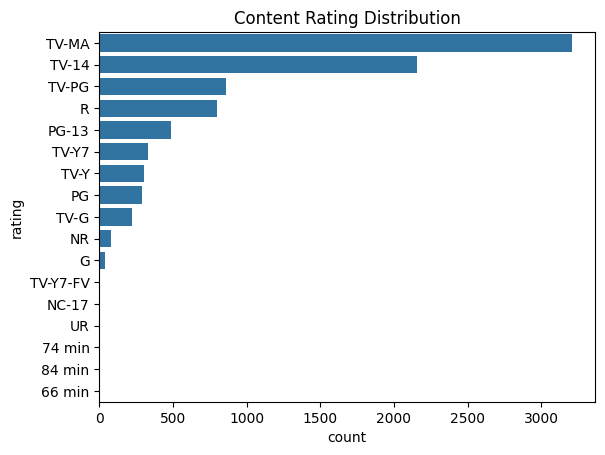

In [54]:
sns.countplot(y='rating', data=df, order=df['rating'].value_counts().index)
plt.title('Content Rating Distribution')
plt.show()

Top 10 Most Common Genres

<ipython-input-55-8c96fdbfd9b9>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(genres), palette='magma')


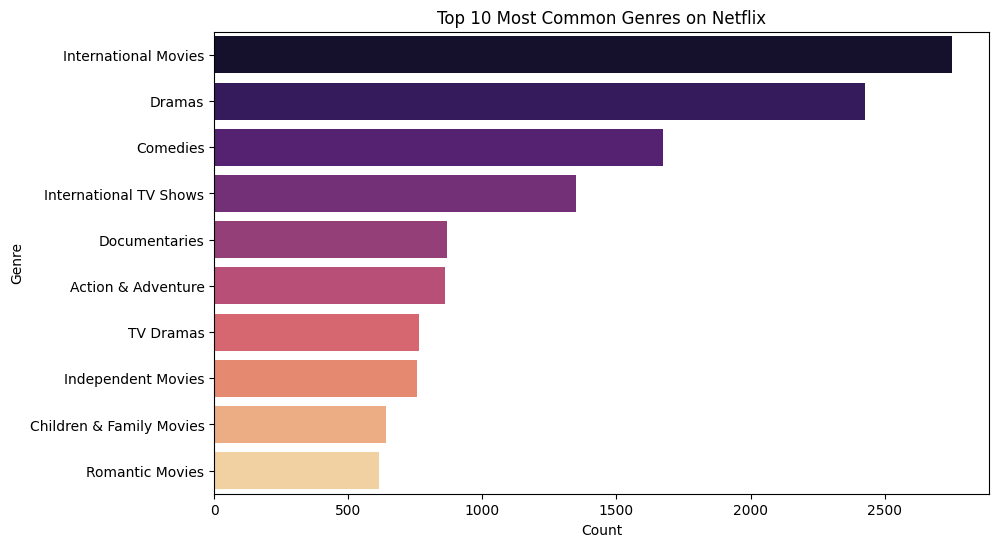

In [55]:
from collections import Counter
genre_counts = Counter()
for genres in df['listed_in'].dropna():
    for genre in genres.split(','):
        genre_counts[genre.strip()] += 1
top_genres = genre_counts.most_common(10)
genres, counts = zip(*top_genres)
plt.figure(figsize=(10,6))
sns.barplot(x=list(counts), y=list(genres), palette='magma')
plt.title("Top 10 Most Common Genres on Netflix")
plt.xlabel("Count")
plt.ylabel("Genre")
plt.show()

Genre Distribution in Movies vs TV Shows (Grouped Bar Chart)

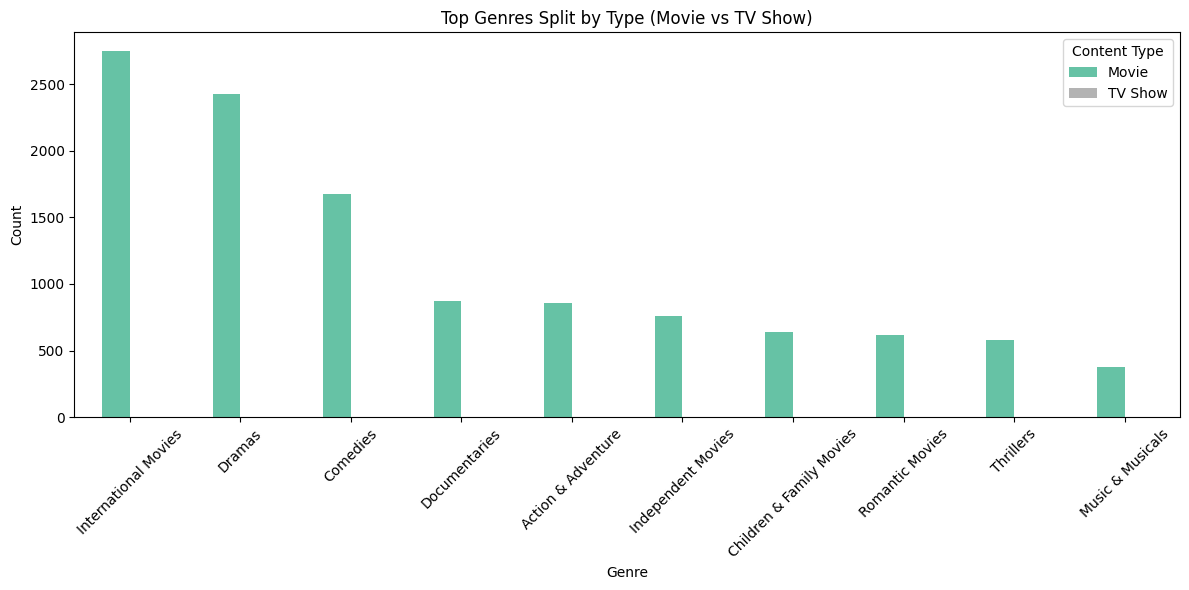

In [56]:
from collections import defaultdict
genre_type = defaultdict(lambda: {'Movie': 0, 'TV Show': 0})
for i, row in df.iterrows():
    genres = str(row['listed_in']).split(',')
    for g in genres:
        genre = g.strip()
        genre_type[genre][row['type']] += 1
genre_df = pd.DataFrame(genre_type).T.sort_values(by='Movie', ascending=False).head(10)
genre_df.plot(kind='bar', figsize=(12,6), colormap='Set2')
plt.title("Top Genres Split by Type (Movie vs TV Show)")
plt.ylabel("Count")
plt.xlabel("Genre")
plt.xticks(rotation=45)
plt.legend(title='Content Type')
plt.tight_layout()
plt.show()

Pie Chart of Top Genres

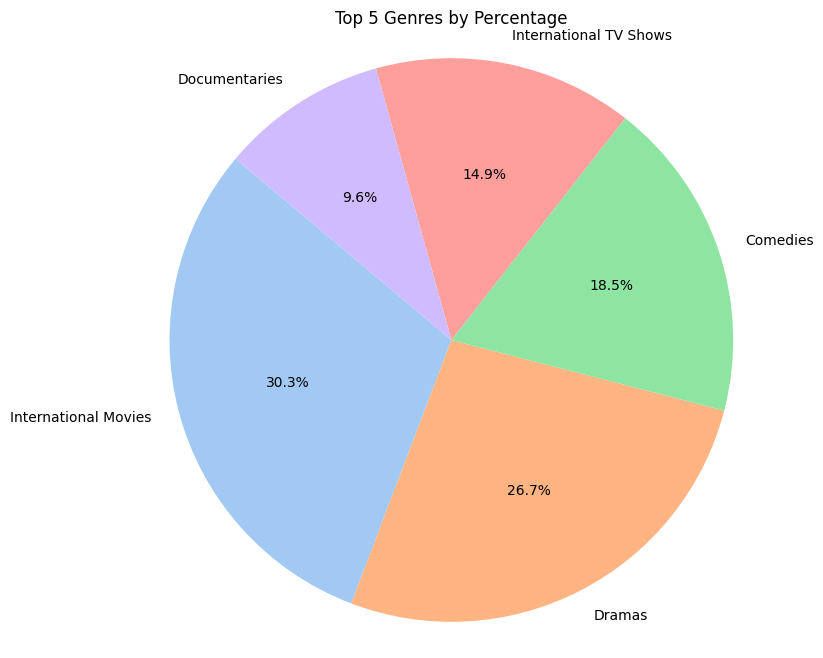

In [57]:
top_5 = dict(top_genres[:5])
plt.figure(figsize=(8,8))
plt.pie(top_5.values(), labels=top_5.keys(), autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title("Top 5 Genres by Percentage")
plt.axis('equal')
plt.show()